In [1]:
!pip install tensorflow
!pip install keras
!pip install sklearn
!pip install pandas
!pip install numpy
!pip install statsmodels
!pip install seaborn
!pip install imblearn
!pip install matplotlib
!pip install scipy
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.neighbors import NearestNeighbors
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.neighbors import NearestCentroid
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,accuracy_score

from collections import Counter

from statsmodels.stats.outliers_influence import variance_inflation_factor

#plot
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 7.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 22.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 48.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 34.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 KB 649.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 25.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 KB 8.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 188.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [51]:
data = pd.read_csv('Frog_Orccurence_Merged.csv')
df = data.drop(['Unnamed: 0','swe','crs','coord','min_lon','max_lon','min_lat','max_lat','ppt_station_influence','tmax_station_influence','tmin_station_influence','vap_station_influence','samples_count'], axis=1)
df.dropna(inplace=True)
data = df
data['frog_c'] = data['frog_count']
del data['frog_count']

In [52]:
data['frog_c'] = pd.qcut(data.frog_c, q=[0, .1,.2,.3, .4,.5, .6,.7, .8,.9, 1], duplicates='drop')

In [53]:
from sklearn.preprocessing import LabelEncoder
data['frog_count'] = LabelEncoder().fit_transform(data['frog_c'])
data

,aet,def,pdsi,pet,ppt,q,soil,srad,tmax,tmin,vap,vpd,ws,frog_c,frog_count
0,33.159744,13.974441,-1.817252,47.108627,78.827477,37.936102,75.667732,179.063904,7.195527,0.965816,0.634824,0.217764,2.868689,"(0.999, 2.0]",0
1,43.688271,25.219135,-1.712036,68.907410,71.111115,27.459877,57.808643,177.817902,13.687646,6.064506,0.882685,0.413302,1.837037,"(0.999, 2.0]",0
2,43.518520,29.419754,-1.662962,72.938271,64.114197,20.632716,40.885803,175.500000,16.011417,7.849073,0.983673,0.520617,1.531173,"(2.0, 3.0]",1
3,43.132717,29.478395,-1.703086,72.589508,62.481480,19.373457,31.157408,174.320984,16.225307,7.935187,0.977161,0.551327,1.434567,"(0.999, 2.0]",0
4,42.726852,31.567129,-1.737962,74.243057,58.335648,15.562500,29.722221,172.266205,17.848146,8.995373,1.068796,0.627268,1.276852,"(29.0, 13920.0]",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23368,46.930557,1.673611,0.285186,48.599537,128.680557,82.300926,38.729168,130.613419,9.076153,2.054861,0.740949,0.263032,7.082410,"(3.0, 5.0]",2
23369,43.974998,3.097222,0.181389,47.063889,115.258331,71.211111,38.802776,128.677780,8.968613,1.621668,0.737861,0.267750,6.992777,"(0.999, 2.0]",0
23370,41.994446,3.047222,0.368055,45.022221,112.455559,70.608333,39.658333,128.547226,9.012504,1.566112,0.750583,0.252445,7.133328,"(0.999, 2.0]",0
23371,45.187500,3.067130,0.137038,48.261574,120.652779,75.256944,39.361111,128.155090,8.986574,1.611113,0.726482,0.275393,6.997914,"(2.0, 3.0]",1


In [54]:
del data['frog_c']

In [55]:
#Capping the outliers at the 99th and 1st percentile.
def outlier_capping(x): #x is a column
    x = x.clip(upper = x.quantile(0.99)) #cap at 99% quantile
    x = x.clip(lower = x.quantile(0.01)) #cap at 1% quantile
    return x #return capped column

data.iloc[:,0:-7]=data.iloc[:,0:-7].apply(lambda x: outlier_capping(x)) #apply outlier capping to all columns except frog_count

In [56]:
x = data.drop(['frog_count'], axis=1)
y = data["frog_count"]

In [57]:
# import library

from imblearn.over_sampling import ADASYN

rus = ADASYN()

# fit predictor and target varialbe
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 10403, 2: 2521, 4: 2334, 6: 2314, 5: 2198, 1: 2052, 3: 1455})
Resample dataset shape Counter({1: 11291, 2: 11094, 3: 10668, 5: 10418, 0: 10403, 4: 10216, 6: 9670})


In [58]:
dummy_y = np_utils.to_categorical(y_rus)
dummy_y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x_rus, dummy_y, test_size=0.3, random_state=42)

In [60]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(51632, 13)
(51632, 7)
(22128, 13)
(22128, 7)


In [61]:
# Data normalization using Minmaxscaler
mm_scaler = MinMaxScaler()
X_train_mm = mm_scaler.fit_transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

In [62]:
# Generating VIF scores & dropping variables having high VIF to avoid multicollinearity
F = pd.DataFrame(X_train_mm,columns=x.columns).drop(['vap','vpd','ppt','srad','pet','tmax','tmin'],axis=1)
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = F.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(F.values, i) for i in range(len(F.columns))]

print(vif_data)

  feature       VIF
0     aet  7.089674
1     def  2.393846
2    pdsi  7.037586
3       q  3.497200
4    soil  6.831165
5      ws  8.541073


In [63]:
#'crs','ppt','srad','def','pet','tmax','tmin
X_train_mm=pd.DataFrame(X_train_mm,columns=x.columns).drop(['vap','vpd','ppt','srad','pet','tmax','tmin'],axis=1)
X_train_mm=X_train_mm.values
X_test_mm=pd.DataFrame(X_test_mm,columns=x.columns).drop(['vap','vpd','ppt','srad','pet','tmax','tmin'],axis=1)
X_test_mm=X_test_mm.values

In [64]:
print(X_train_mm.shape)
print(y_train.shape)

(51632, 6)
(51632, 7)


In [72]:
# Model checkpoint
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dropout
opt = RMSprop(lr=0.0001, decay=1e-6)

checkpoint = ModelCheckpoint(filepath='final_model.hdf5',
                             monitor='accuracy',verbose=1,save_weights_only=True,save_best_only=True,mode='max')

# model architecture for ANN model
model = Sequential()
model.add(Dense(512, activation="tanh", input_dim=6))
model.add(Dense(256, activation="tanh"))
model.add(Dense(128, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1))
model.add(Dense(32, activation="tanh"))
model.add(Dense(16, activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(7, activation="softmax"))


# Compile model: The model is initialized with the Adam optimizer and then it is compiled
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

# Patient early stopping
es = EarlyStopping(verbose=1, patience=400)

# Fitting the model on train data
history = model.fit(X_train_mm, y_train, validation_data=(X_test_mm, y_test), epochs=10000, batch_size=200,
                    verbose=2, callbacks=[es,checkpoint])

Epoch 1/10000

Epoch 1: accuracy improved from -inf to 0.18306, saving model to final_model.hdf5
259/259 - 3s - loss: 1.9265 - accuracy: 0.1831 - val_loss: 1.9087 - val_accuracy: 0.1949 - 3s/epoch - 12ms/step
Epoch 2/10000

Epoch 2: accuracy improved from 0.18306 to 0.19757, saving model to final_model.hdf5
259/259 - 2s - loss: 1.9024 - accuracy: 0.1976 - val_loss: 1.8989 - val_accuracy: 0.2039 - 2s/epoch - 9ms/step
Epoch 3/10000

Epoch 3: accuracy improved from 0.19757 to 0.20418, saving model to final_model.hdf5
259/259 - 2s - loss: 1.8909 - accuracy: 0.2042 - val_loss: 1.8832 - val_accuracy: 0.2108 - 2s/epoch - 10ms/step
Epoch 4/10000

Epoch 4: accuracy improved from 0.20418 to 0.21392, saving model to final_model.hdf5
259/259 - 2s - loss: 1.8781 - accuracy: 0.2139 - val_loss: 1.8758 - val_accuracy: 0.2160 - 2s/epoch - 9ms/step
Epoch 5/10000

Epoch 5: accuracy improved from 0.21392 to 0.21789, saving model to final_model.hdf5
259/259 - 2s - loss: 1.8696 - accuracy: 0.2179 - val_loss

In [75]:
loss, acc = model.evaluate(X_test_mm, y_test,verbose=0)
print("Model loss %.2f, Accuracy %.2f" % ((loss*100),(acc*100))) 

Model loss 152.67, Accuracy 50.44


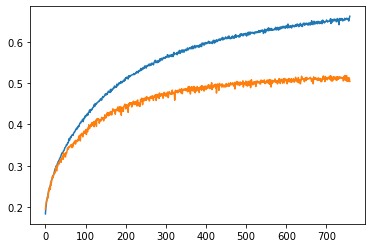

In [76]:
# Training loss vs Validation loss plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [77]:
y_pred = model.predict(X_test_mm)

In [83]:
import sklearn
matrix =sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

<AxesSubplot:>

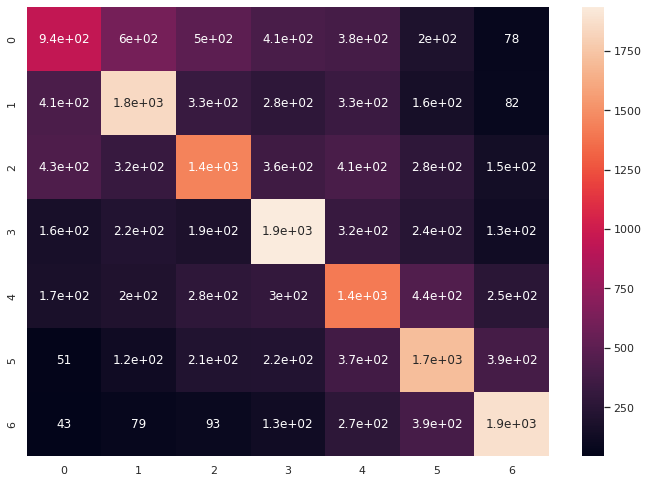

In [85]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Set the figure size
cm = pd.DataFrame(matrix, columns=[0,1,2,3,4,5,6], index=[0,1,2,3,4,5,6]) # Create the confusion matrix
sns.heatmap(cm, annot=True) # Plot the heatmap